`pandas` for data processing and csv I/O

`Text Blob` for Natural Language Processing. Using Text Blob for sentiment analysis is quite simple


In [ ]:

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [19]:
data=pd.read_csv("/content/BA_reviews.csv")
data.head(5)

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Being a silver flyer and bo...
1,1,Not Verified | I find BA incredibly tacky and...
2,2,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...
3,3,Not Verified | Great thing about British Airw...
4,4,Not Verified | The staff are friendly. The pla...



 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists.

In [8]:

data['reviews'] = data['reviews'].str.replace("[^a-zA-Z0-9]", " ")
data['reviews'] = data['reviews'].str.replace("Not Verified", " ")
data['reviews'] = data['reviews'].str.replace("Trip Verified", " ")
data.head(5)

<ipython-input-8-bcd1ab1a16b6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace("[^a-zA-Z0-9]", " ")


,reviews
0,I find BA incredibly tacky and constantly...
1,Flew ATL to LHR 8th Jan 2023 Was unluc...
2,Great thing about British Airways A380 is...
3,The staff are friendly The plane was cold...
4,Probably the worst business class experi...


`Polarity` determines the sentiment of the text. Its values lie in [-1,1] where -1 denotes a highly negative sentiment and 1 denotes a highly positive sentiment.

In [9]:
reviews1 = data['reviews'].tolist()
sentiment_scores = []
for review in reviews1:
    sentiment = TextBlob(review).sentiment.polarity
    sentiment_scores.append(sentiment)
data['sentiment_score'] = sentiment_scores

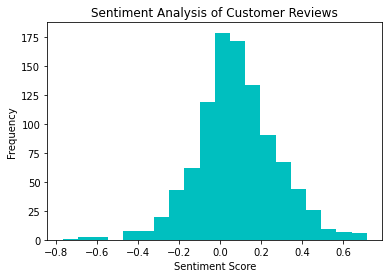

In [10]:
# Plotting Histogram for sentiment scores
plt.hist(sentiment_scores, bins=20, color='c')
plt.title("Sentiment Analysis of Customer Reviews")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

create table and charts using pandas

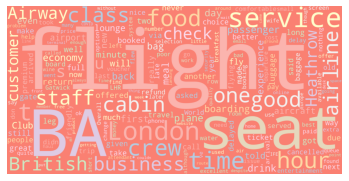

In [11]:
#Creating the text variable
text = " ".join(cat for cat in data.reviews)
# Generate word cloud
word_cloud = WordCloud(
        width=4000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS, ) . generate (text)
# Display the generated Word Cloud
plt.imshow (word_cloud)
plt.axis( "off" )
plt.show()